# 빅데이터분석 특강 기말고사 예상문제 

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Special Topics in Big Data Analysis]

## imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp 

In [2]:
tnp.experimental_enable_numpy_behavior()

In [3]:
%load_ext tensorboard

In [4]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+ s + ';}')

## 1. Fashion_mnist, DNN (30점)

`(1)` `tf.keras.datasets.fashion_mnist.load_data()`을 이용하여 fashion_mnist 자료를 불러온 뒤 아래의 네트워크를 이용하여 적합하라. 

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [7]:
X = tf.constant(x_train.reshape(-1,28,28,1),dtype=tf.float64)
y = tf.keras.utils.to_categorical(y_train)
XX = tf.constant(x_test.reshape(-1,28,28,1),dtype=tf.float64)
yy = tf.keras.utils.to_categorical(y_test)

- 평가지표로 accuracy를 이용할 것 
- epoch은 10으로 설정할 것 
- optimizer는 adam을 이용할 것 

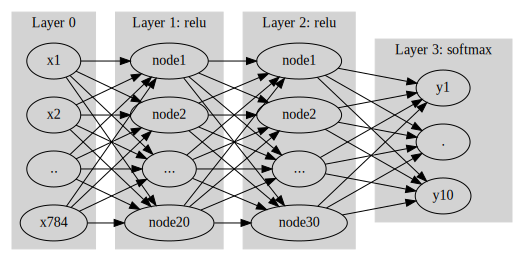

In [ ]:
#collapse
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    "x784" -> "node1"
    
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node20"
    "x2" -> "node20"
    ".." -> "node20"
    "x784" -> "node20"


    label = "Layer 1: relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "node1" -> "node1 "
    "node2" -> "node1 "
    "..." -> "node1 "
    "node20" -> "node1 "
    
    "node1" -> "node2 "
    "node2" -> "node2 "
    "..." -> "node2 "
    "node20" -> "node2 "
    
    "node1" -> "... "
    "node2" -> "... "
    "..." -> "... "
    "node20" -> "... "

    "node1" -> "node30 "
    "node2" -> "node30 "
    "..." -> "node30 "
    "node20" -> "node30 "


    label = "Layer 2: relu"
}
subgraph cluster_4{
    style=filled;
    color=lightgrey;

    "node1 " -> "y10"
    "node2 " -> "y10"
    "... " -> "y10"
    "node30 " -> "y10"
    
    "node1 " -> "y1"
    "node2 " -> "y1"
    "... " -> "y1"
    "node30 " -> "y1"
    
    "node1 " -> "."
    "node2 " -> "."
    "... " -> "."
    "node30 " -> "."
    
    label = "Layer 3: softmax"
}
''')


In [8]:
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(20,activation='relu'))
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')
net.fit(X,y,epochs=10,batch_size=200) 

Epoch 1/10
 48/300 [===>..........................] - ETA: 0s - loss: 7.7403 - accuracy: 0.2756 

2022-05-28 22:21:37.913209: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


300/300 [==============================] - 2s 3ms/step - loss: 2.4349 - accuracy: 0.4691
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 1.0240 - accuracy: 0.6398
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.8204 - accuracy: 0.6942
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.7410 - accuracy: 0.7104
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.7002 - accuracy: 0.7190
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.6758 - accuracy: 0.7265
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.6578 - accuracy: 0.7294
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.6435 - accuracy: 0.7336
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 0.6344 - accuracy: 0.7368
Epoch 10/10
300/300 [==============================] - 1s 4ms/step - loss: 0.6135 - accuracy: 0.7411


In [9]:
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (200, 784)                0         
                                                                 
 dense (Dense)               (200, 20)                 15700     
                                                                 
 dense_1 (Dense)             (200, 30)                 630       
                                                                 
 dense_2 (Dense)             (200, 10)                 310       
                                                                 
Total params: 16,640
Trainable params: 16,640
Non-trainable params: 0
_________________________________________________________________


`(2)` (1)에서 적합된 네트워크를 이용하여 test data의 accuracy를 구하라. 

In [10]:
net.evaluate(XX,yy)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.6408 - accuracy: 0.7401


0.7401000261306763

test data의 accuracy: `0.2567000091075897`

`(3)` train set에서 20%의 자료를 validation 으로 분리하여 50에폭동안 학습하라. 텐서보드를 이용하여 train accuracy와 validation accuracy를 시각화 하고 결과를 해석하라. 오버피팅이라고 볼 수 있는가? 

In [11]:
cb1 = tf.keras.callbacks.TensorBoard()
net.fit(X,y,epochs=50,batch_size=200,validation_split=0.2,callbacks=cb1,verbose=1) 

Epoch 1/50
240/240 [==============================] - 1s 5ms/step - loss: 0.6105 - accuracy: 0.7431 - val_loss: 0.5854 - val_accuracy: 0.7544
Epoch 2/50
240/240 [==============================] - 1s 5ms/step - loss: 0.6013 - accuracy: 0.7462 - val_loss: 0.5951 - val_accuracy: 0.7470
Epoch 3/50
240/240 [==============================] - 1s 5ms/step - loss: 0.5830 - accuracy: 0.7499 - val_loss: 0.5892 - val_accuracy: 0.7527
Epoch 4/50
240/240 [==============================] - 1s 5ms/step - loss: 0.5798 - accuracy: 0.7510 - val_loss: 0.5852 - val_accuracy: 0.7498
Epoch 5/50
240/240 [==============================] - 1s 5ms/step - loss: 0.5833 - accuracy: 0.7501 - val_loss: 0.5929 - val_accuracy: 0.7526
Epoch 6/50
240/240 [==============================] - 1s 5ms/step - loss: 0.5637 - accuracy: 0.7559 - val_loss: 0.5830 - val_accuracy: 0.7559
Epoch 7/50
240/240 [==============================] - 1s 5ms/step - loss: 0.5644 - accuracy: 0.7560 - val_loss: 0.5937 - val_accuracy: 0.7538
Epoch 

In [14]:
%tensorboard --logdir logs --host 0.0.0.0

Reusing TensorBoard on port 6006 (pid 762504), started 0:06:47 ago. (Use '!kill 762504' to kill it.)

train accuracy와 validation accuracy 둘 다 accuracy가 80%가 넘게 도달하였다.

하지만 우리의 목적은 validation accuracy가 더 좋게 나오길 원하는 것이다.

추가로, training loss는 줄어들고 있는데 validation loss는 오히려 커지거나 값이 변하지 않고 있다.

오버피팅 일 수 있겠다.

`(4)` (3)에서 적합된 네트워크를 이용하여 test data의 accuracy를 구하라. (2)의 결과와 비교하라. 

In [13]:
net.evaluate(XX,yy)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.5605 - accuracy: 0.8026


0.8026000261306763

(2)의 결과는 test data의 accuracy: `0.2567000091075897` 였는데,

(4)의 결과는 test data의 accuracy: `0.8026000261306763` 였다.

validation을 split하여 training하니 확실히 정확도가 높아진 것을 확인할 수 있었다.

하지만 (3)의 결과에서 알 수 있듯이 오버피팅의 징조가 보이니 정말 좋은 net을 설계했다고는 할 수 없겠다.

`(5)` 조기종료기능을 이용하여 (3)의 네트워크를 다시 학습하라. 학습결과를 텐서보드를 이용하여 시각화 하라. 
- patience=3 으로 설정할 것

In [16]:
!rm -rf logs
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(20,activation='relu'))
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')
net.fit(X,y,epochs=10,batch_size=200) 

Epoch 1/10
300/300 [==============================] - 1s 4ms/step - loss: 3.6829 - accuracy: 0.2229
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 1.6402 - accuracy: 0.3483
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 1.4373 - accuracy: 0.4197
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 1.3497 - accuracy: 0.4394
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 1.2988 - accuracy: 0.4513
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 1.2740 - accuracy: 0.4568
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 1.2479 - accuracy: 0.4622
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 1.2392 - accuracy: 0.4652
Epoch 9/10
300/300 [==============================] - 1s 4ms/step - loss: 1.1705 - accuracy: 0.5117
Epoch 10/10
300/300 [==============================] - 1s 4ms/step - loss: 1.0703 - accuracy: 0.5468

In [17]:
cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=3) # 좀더 참다가 멈추어라 
net.fit(X,y,epochs=200,batch_size=200,validation_split=0.2,callbacks=[cb1,cb2]) 

Epoch 1/200
240/240 [==============================] - 1s 5ms/step - loss: 1.0103 - accuracy: 0.5677 - val_loss: 1.0184 - val_accuracy: 0.5712
Epoch 2/200
240/240 [==============================] - 1s 5ms/step - loss: 0.9971 - accuracy: 0.5730 - val_loss: 0.9965 - val_accuracy: 0.5602
Epoch 3/200
240/240 [==============================] - 1s 5ms/step - loss: 0.9663 - accuracy: 0.5861 - val_loss: 0.9880 - val_accuracy: 0.5838
Epoch 4/200
240/240 [==============================] - 1s 5ms/step - loss: 0.9475 - accuracy: 0.5985 - val_loss: 0.9806 - val_accuracy: 0.6210
Epoch 5/200
240/240 [==============================] - 1s 5ms/step - loss: 0.9132 - accuracy: 0.6226 - val_loss: 0.9414 - val_accuracy: 0.6431
Epoch 6/200
240/240 [==============================] - 1s 5ms/step - loss: 0.8917 - accuracy: 0.6288 - val_loss: 0.9341 - val_accuracy: 0.6244
Epoch 7/200
240/240 [==============================] - 1s 5ms/step - loss: 0.8688 - accuracy: 0.6400 - val_loss: 0.9124 - val_accuracy: 0.6269

In [34]:
%tensorboard --logdir logs --host 0.0.0.0

Reusing TensorBoard on port 6006 (pid 763398), started 0:24:40 ago. (Use '!kill 763398' to kill it.)

## 2. Fashion_mnist, CNN (30점)

`(1)` `tf.keras.datasets.fashion_mnist.load_data()`을 이용하여 fashion_mnist 자료를 불러온 뒤 아래의 네트워크를 이용하여 적합하라. 

In [19]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [20]:
X = tf.constant(x_train.reshape(-1,28,28,1),dtype=tf.float64)
y = tf.keras.utils.to_categorical(y_train)
XX = tf.constant(x_test.reshape(-1,28,28,1),dtype=tf.float64)
yy = tf.keras.utils.to_categorical(y_test)

- 이때 n1=6, n2=16, n3=120 으로 설정한다, 드랍아웃비율은 20%로 설정한다.
- `net.summary()`를 출력하여 설계결과를 확인하라.

![](https://editor.analyticsvidhya.com/uploads/90650dnn2.jpeg)

In [29]:
net = tf.keras.Sequential()
net.add(tf.keras.layers.Conv2D(6,(5,5)))
net.add(tf.keras.layers.MaxPool2D())
net.add(tf.keras.layers.Conv2D(16,(5,5)))
net.add(tf.keras.layers.MaxPool2D())
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(120,activation='relu'))
net.add(tf.keras.layers.Dropout(0.2))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')
net.fit(X,y,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1771 - accuracy: 0.7094
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5674 - accuracy: 0.7912
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4918 - accuracy: 0.8197
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4560 - accuracy: 0.8346
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4299 - accuracy: 0.8445


In [30]:
net.layers

In [32]:
c1,m1,c2,m2,flttn,rel,dro,dns = net.layers

print(X.shape) 
print(c1(X).shape) 
print(m1(c1(X)).shape) 
print(c2(m1(c1(X))).shape) 
print(m2(c2(m1(c1(X)))).shape) 
print(flttn(m2(c2(m1(c1(X))))).shape) 
print(rel(flttn(m2(c2(m1(c1(X)))))).shape) 
print(dro(rel(flttn(m2(c2(m1(c1(X))))))).shape) 
print(dns(dro(rel(flttn(m2(c2(m1(c1(X)))))))).shape) 

(60000, 28, 28, 1)
(60000, 24, 24, 6)
(60000, 12, 12, 6)
(60000, 8, 8, 16)
(60000, 4, 4, 16)
(60000, 256)
(60000, 120)
(60000, 120)
(60000, 10)


In [33]:
net.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (32, 24, 24, 6)           156       
                                                                 
 max_pooling2d_4 (MaxPooling  (32, 12, 12, 6)          0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (32, 8, 8, 16)            2416      
                                                                 
 max_pooling2d_5 (MaxPooling  (32, 4, 4, 16)           0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (32, 256)                 0         
                                                                 
 dense_7 (Dense)             (32, 120)                

`(2)` n1=(6,64,128), n2=(16,256)에 대하여 test set의 loss가 최소화되는 조합을 찾아라. 결과를 텐서보드로 시각화하는 코드를 작성하라. 
- epoc은 3회로 한정한다. 
- validation_split은 0.2로 설정한다. 

6,16

In [47]:
!rm -rf logs
net = tf.keras.Sequential()
net.add(tf.keras.layers.Conv2D(6,(5,5)))
net.add(tf.keras.layers.MaxPool2D())
net.add(tf.keras.layers.Conv2D(16,(5,5)))
net.add(tf.keras.layers.MaxPool2D())
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(120,activation='relu'))
net.add(tf.keras.layers.Dropout(0.2))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [48]:
cb1 = tf.keras.callbacks.TensorBoard()
net.fit(X,y,epochs=3,batch_size=200,validation_split=0.2,callbacks=cb1,verbose=1) 

Epoch 1/3
240/240 [==============================] - 2s 6ms/step - loss: 2.7016 - accuracy: 0.6601 - val_loss: 0.7026 - val_accuracy: 0.7517
Epoch 2/3
240/240 [==============================] - 1s 6ms/step - loss: 0.7275 - accuracy: 0.7466 - val_loss: 0.5705 - val_accuracy: 0.7952
Epoch 3/3
240/240 [==============================] - 1s 6ms/step - loss: 0.6091 - accuracy: 0.7815 - val_loss: 0.5276 - val_accuracy: 0.8085


In [50]:
%tensorboard --logdir logs --host 0.0.0.0

Reusing TensorBoard on port 6006 (pid 764204), started 0:00:19 ago. (Use '!kill 764204' to kill it.)

6,256

In [52]:
!rm -rf logs
net = tf.keras.Sequential()
net.add(tf.keras.layers.Conv2D(6,(5,5)))
net.add(tf.keras.layers.MaxPool2D())
net.add(tf.keras.layers.Conv2D(256,(5,5)))
net.add(tf.keras.layers.MaxPool2D())
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(120,activation='relu'))
net.add(tf.keras.layers.Dropout(0.2))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [53]:
cb1 = tf.keras.callbacks.TensorBoard()
net.fit(X,y,epochs=3,batch_size=200,validation_split=0.2,callbacks=cb1,verbose=1) 

Epoch 1/3
240/240 [==============================] - 2s 6ms/step - loss: 2.6628 - accuracy: 0.6534 - val_loss: 0.5545 - val_accuracy: 0.8123
Epoch 2/3
240/240 [==============================] - 1s 6ms/step - loss: 0.6196 - accuracy: 0.7800 - val_loss: 0.4724 - val_accuracy: 0.8266
Epoch 3/3
240/240 [==============================] - 1s 6ms/step - loss: 0.4923 - accuracy: 0.8230 - val_loss: 0.4039 - val_accuracy: 0.8576


In [55]:
%tensorboard --logdir logs --host 0.0.0.0

Reusing TensorBoard on port 6006 (pid 764434), started 0:00:02 ago. (Use '!kill 764434' to kill it.)

64,16

In [62]:
!rm -rf logs
net = tf.keras.Sequential()
net.add(tf.keras.layers.Conv2D(64,(5,5)))
net.add(tf.keras.layers.MaxPool2D())
net.add(tf.keras.layers.Conv2D(16,(5,5)))
net.add(tf.keras.layers.MaxPool2D())
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(120,activation='relu'))
net.add(tf.keras.layers.Dropout(0.2))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [63]:
cb1 = tf.keras.callbacks.TensorBoard()
net.fit(X,y,epochs=3,batch_size=200,validation_split=0.2,callbacks=cb1,verbose=1) 

Epoch 1/3
240/240 [==============================] - 2s 6ms/step - loss: 2.4533 - accuracy: 0.6721 - val_loss: 0.6265 - val_accuracy: 0.7750
Epoch 2/3
240/240 [==============================] - 1s 6ms/step - loss: 0.6485 - accuracy: 0.7706 - val_loss: 0.5266 - val_accuracy: 0.8030
Epoch 3/3
240/240 [==============================] - 1s 6ms/step - loss: 0.5526 - accuracy: 0.8027 - val_loss: 0.4794 - val_accuracy: 0.8201


In [65]:
%tensorboard --logdir logs --host 0.0.0.0

Reusing TensorBoard on port 6006 (pid 764894), started 0:00:42 ago. (Use '!kill 764894' to kill it.)

64,256

In [68]:
!rm -rf logs
net = tf.keras.Sequential()
net.add(tf.keras.layers.Conv2D(64,(5,5)))
net.add(tf.keras.layers.MaxPool2D())
net.add(tf.keras.layers.Conv2D(256,(5,5)))
net.add(tf.keras.layers.MaxPool2D())
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(120,activation='relu'))
net.add(tf.keras.layers.Dropout(0.2))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [69]:
cb1 = tf.keras.callbacks.TensorBoard()
net.fit(X,y,epochs=3,batch_size=200,validation_split=0.2,callbacks=cb1,verbose=1) 

Epoch 1/3
240/240 [==============================] - 2s 7ms/step - loss: 3.4449 - accuracy: 0.6198 - val_loss: 0.6599 - val_accuracy: 0.7502
Epoch 2/3
240/240 [==============================] - 1s 6ms/step - loss: 0.6967 - accuracy: 0.7526 - val_loss: 0.5214 - val_accuracy: 0.8175
Epoch 3/3
240/240 [==============================] - 1s 6ms/step - loss: 0.5888 - accuracy: 0.7945 - val_loss: 0.4677 - val_accuracy: 0.8439


In [71]:
%tensorboard --logdir logs --host 0.0.0.0

Reusing TensorBoard on port 6006 (pid 765124), started 0:00:03 ago. (Use '!kill 765124' to kill it.)

128,16

In [73]:
!rm -rf logs
net = tf.keras.Sequential()
net.add(tf.keras.layers.Conv2D(128,(5,5)))
net.add(tf.keras.layers.MaxPool2D())
net.add(tf.keras.layers.Conv2D(16,(5,5)))
net.add(tf.keras.layers.MaxPool2D())
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(120,activation='relu'))
net.add(tf.keras.layers.Dropout(0.2))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [74]:
cb1 = tf.keras.callbacks.TensorBoard()
net.fit(X,y,epochs=3,batch_size=200,validation_split=0.2,callbacks=cb1,verbose=1) 

Epoch 1/3
240/240 [==============================] - 2s 6ms/step - loss: 2.6449 - accuracy: 0.6900 - val_loss: 0.5807 - val_accuracy: 0.7972
Epoch 2/3
240/240 [==============================] - 1s 6ms/step - loss: 0.6236 - accuracy: 0.7857 - val_loss: 0.5002 - val_accuracy: 0.8232
Epoch 3/3
240/240 [==============================] - 1s 6ms/step - loss: 0.5316 - accuracy: 0.8128 - val_loss: 0.4558 - val_accuracy: 0.8342


In [76]:
%tensorboard --logdir logs --host 0.0.0.0

Reusing TensorBoard on port 6006 (pid 765353), started 0:00:04 ago. (Use '!kill 765353' to kill it.)

128,256

In [78]:
!rm -rf logs
net = tf.keras.Sequential()
net.add(tf.keras.layers.Conv2D(128,(5,5)))
net.add(tf.keras.layers.MaxPool2D())
net.add(tf.keras.layers.Conv2D(256,(5,5)))
net.add(tf.keras.layers.MaxPool2D())
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(120,activation='relu'))
net.add(tf.keras.layers.Dropout(0.2))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(optimizer='adam',loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [79]:
cb1 = tf.keras.callbacks.TensorBoard()
net.fit(X,y,epochs=3,batch_size=200,validation_split=0.2,callbacks=cb1,verbose=1) 

Epoch 1/3
240/240 [==============================] - 2s 8ms/step - loss: 5.7759 - accuracy: 0.3646 - val_loss: 1.2251 - val_accuracy: 0.5865
Epoch 2/3
240/240 [==============================] - 2s 7ms/step - loss: 1.3310 - accuracy: 0.5137 - val_loss: 1.0505 - val_accuracy: 0.6373
Epoch 3/3
240/240 [==============================] - 2s 7ms/step - loss: 1.1302 - accuracy: 0.6027 - val_loss: 0.8951 - val_accuracy: 0.7095


In [81]:
%tensorboard --logdir logs --host 0.0.0.0

Reusing TensorBoard on port 6006 (pid 765583), started 0:00:01 ago. (Use '!kill 765583' to kill it.)

## 3. CIFAR10 (30점)

`tf.keras.datasets.cifar10.load_data()`을 이용하여 CIFAR10을 불러온 뒤 적당한 네트워크를 사용하여 적합하라. 

- 결과를 텐서보드로 시각화할 필요는 없다. 
- 자유롭게 모형을 설계하여 적합하라. 
- test set의 accuracy가 70%이상인 경우만 정답으로 인정한다. 

## 4. 다음을 읽고 물음에 답하라. (10점)

(1) (128,128,3)의 shape을 가진 텐서가 `tf.keras.layers.Conv2D(5,(2,2))`으로 만들어진 커널을 통과할시 나오는 shape은?

(2) (24,24,16)의 shape을 가진 텐서가 `tf.keras.layers.Flatten()`을 통과할때 나오는 텐서의 shape은? 

(3)

(4)

(5)